In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df17d = pd.read_csv(os.path.join('df17D.csv'))
del df17d['Unnamed: 0']
del df17d['Year']
del df17d['Month']
del df17d['Day']
del df17d['Day_of_Week']
del df17d['Weekend']
del df17d['Datetime']

df17d.head()

,MW,Utility,Temp(f)
0,1695.0,DAYTON,42.8
1,2266.0,DAYTON,8.6
2,2230.0,DAYTON,6.8
3,2205.0,DAYTON,5.0
4,2190.0,DAYTON,3.2


In [5]:
df_2017pos = df17d[df17d['Temp(f)'] >= 60].copy()
df_2017neg = df17d[df17d['Temp(f)'] < 60].copy()

In [6]:
X = df_2017pos["Temp(f)"].values.reshape(-1, 1)
y = df_2017pos["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (4320, 1) (4320, 1)


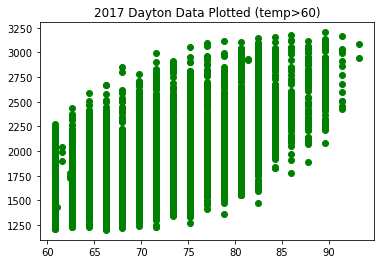

In [7]:
plt.scatter(X, y,color='g')
plt.title("2017 Dayton Data Plotted (temp>60)")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [13]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3213887483047767
Testing Score: 0.3377765716361497


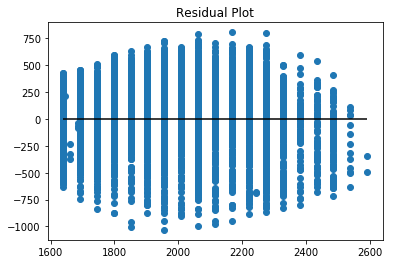

In [14]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

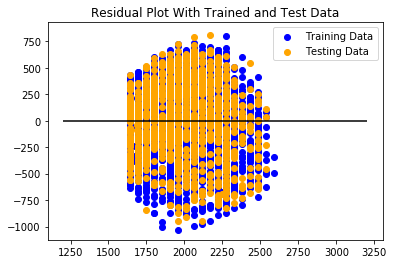

In [15]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [16]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[29.43651949]]
y-axis intercept:  [-150.83901229]


In [17]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  -150.83901229+ 29.43651949 * x_min
y_max = -150.83901229+ 29.43651949 * x_max

Actual Min Value: 1200.0
Predicted Min Value: [[1638.90137257]]
Actual Max Value: 3204.0
Predicted Max Value: [[2592.64460398]]


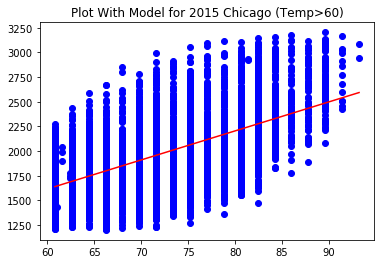

In [18]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2015 Chicago (Temp>60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [19]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1701.]
Predicted output: [1691.88710765]
Prediction Error: [-9.11289235]


In [28]:
X = df_2017neg["Temp(f)"].values.reshape(-1, 1)
y = df_2017neg["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (4402, 1) (4402, 1)


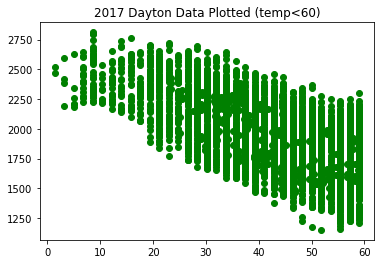

In [29]:
plt.scatter(X, y,color='g')
plt.title("2017 Dayton Data Plotted (temp<60)")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [33]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.352557213234183
Testing Score: 0.37886260288118284


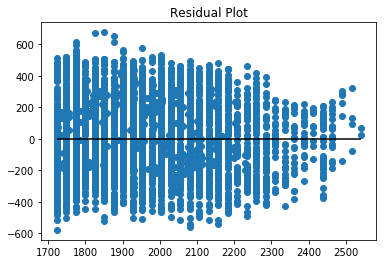

In [34]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

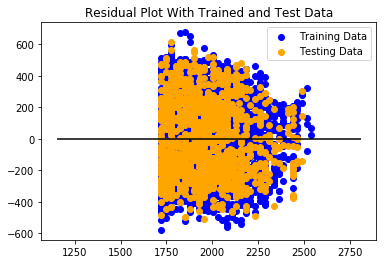

In [35]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [36]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-14.19485346]]
y-axis intercept:  [2560.59104754]


In [37]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  2560.59104754+ (-14.19485346 * x_min)
y_max = 2560.59104754+ (-14.19485346 * x_max)

Actual Min Value: 1151.0
Predicted Min Value: [[2540.71825269]]
Actual Max Value: 2812.0
Predicted Max Value: [[1723.09469314]]


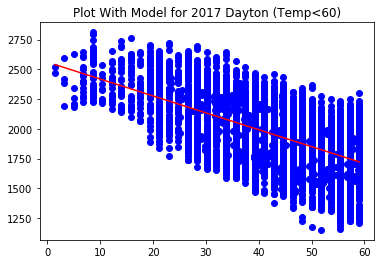

In [38]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2017 Dayton (Temp<60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [39]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1695.]
Predicted output: [1953.05131926]
Prediction Error: [258.05131926]


In [40]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [43]:
modeldf

,Actual,Error,Predicted
0,1695.0,258.051319,1953.051319
1,2266.0,172.515308,2438.515308
2,2230.0,234.066044,2464.066044
3,2205.0,284.616780,2489.616780
4,2190.0,325.167516,2515.167516
5,2185.0,304.616780,2489.616780
6,2213.0,276.616780,2489.616780
7,2280.0,184.066044,2464.066044
8,2341.0,123.066044,2464.066044
9,2392.0,72.066044,2464.066044
